# scan collection plot examples


A notebook showing how to use [Neutronpy](http://neutronpy.github.io/) to quickly generate a false color contour plot or a waterfall plot of a collection of scans.  [Neutronpy](http://neutronpy.github.io/) is a powerful set of tools for dealing with triple axis data.  Detailed documentation is at [http://neutronpy.github.io/](http://neutronpy.github.io/).  If you are not familiar with Ipython notebooks,  a quick get started is in the notebooks directory

import needed python modules

In [1]:
import neutronpy.data.scans as npysc
import neutronpy.fileio as npyio
import os
import matplotlib.pyplot as pyplot
import numpy as np

enable inline plotting

In [2]:
%matplotlib inline


Parameters to enter
-------------------

In [3]:
expnumber=718
instr='HB1A'

change to the appropriate directory and generate the prefix infront of each scan for a looped import

In [4]:
os.chdir('/HFIR/%s/exp%d/'%(instr,expnumber))
prefix='Datafiles/%s_exp0%d_'%(instr,expnumber)

Check to be sure we are in the correct directory

In [5]:
pwd

u'/HFIR/HB1A/exp718'

Make a dictionary full of individual scans.  In this case it is by looping through and loading a serise of scans in a directory.  Nevertheless, the scans do not need to be sequential or even from the same experiment.  Any scans included in the dictionary will be acted on as a whole.  In this case the keys to the dictionary are 

In [6]:
scansin={}
for idx in range(222,244):
    scansin[idx]=npyio.load_data(prefix+'scan0%d.dat'%idx)
    

take a look at the first scan 

In [7]:
tst_scn=scansin[222]

A quick look at a single scan

/SNS/users/19g/miniconda/envs/tas/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


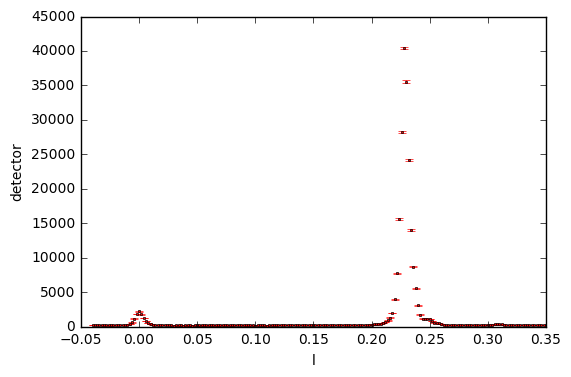

In [8]:
tst_scn.plot()

to perform a plot of the whole collection one might want to know the other parameters of a scan

In [9]:
print(tst_scn.data_columns)

['h', 'k', 'l', 'time', 'detector', 'monitor', 'mcu', 'm2', 'mag_e', 's1', 's2', 'sgl', 'sgu', 'a1', 'a2', 'q', 'ei', 'ef', 'e', 'coldtip', 'tsample', 'temp', 'persistent_field']


create a scans object to work with

In [10]:
s_obj=npysc.Scans(scans_dict=scansin)

Perform a colour contour plot. The parameter 'coldtip' is what varies across the scans.

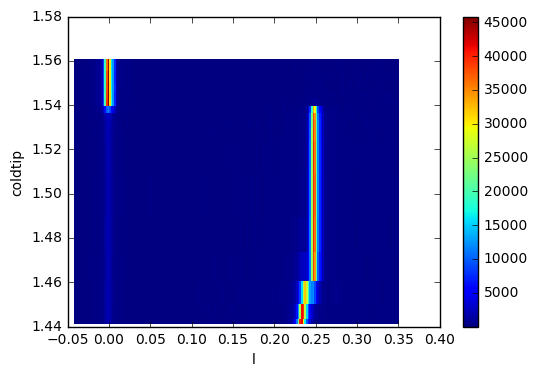

In [11]:
s_obj.pcolor(x='l',y='coldtip')

Perform a waterfall plot.  The parameter 'coldtip' is what varies between scans.  The offseet is how far in y each plot is offest from the next.

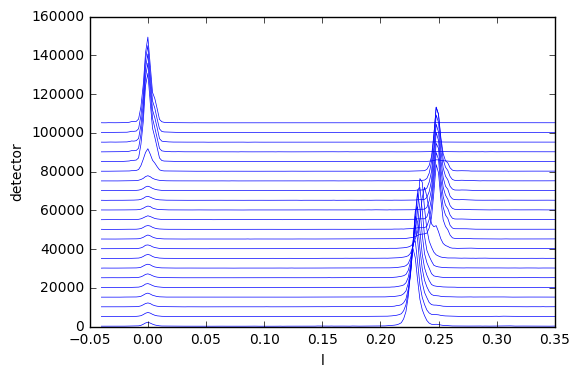

In [12]:
s_obj.waterfall(x='l',label_column='coldtip',offset=5000)

A plot of the mean value of 'coldtip' as a function of scan number.  

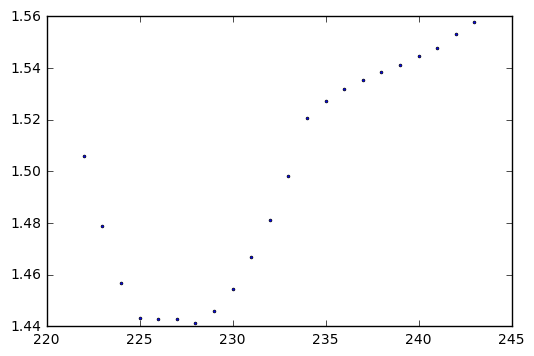

In [16]:
pyplot.plot(scansin.keys(),s_obj.mean_col('coldtip'),'bo')